In [1]:
import numpy as np
from scipy.io import wavfile
import IPython.display as ipd
import matplotlib.pyplot as plt

In [11]:
filename = "d:/ngoding/sistem darbuka/dataset/tonePattern/baladi2_1.wav"
ipd.Audio(filename)

In [6]:
sample_rate, audio = wavfile.read(filename)
print("Sample rate: {0}Hz".format(sample_rate))
print("Audio duration: {0}s".format(len(audio) / sample_rate))

Sample rate: 44100Hz
Audio duration: 3.9189795918367345s


In [7]:
def normalize_audio(audio):
    audio = audio / np.max(np.abs(audio))
    return audio

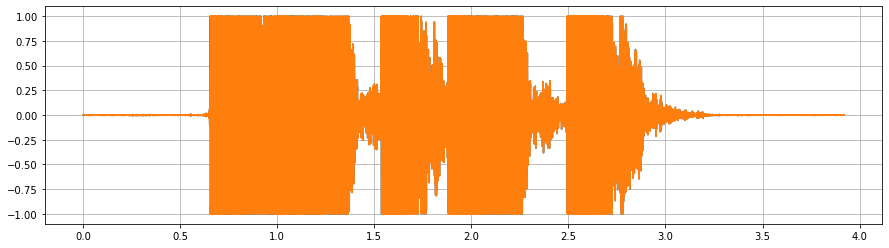

In [13]:
audio = normalize_audio(audio)
plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
plt.grid(True)

In [14]:
import librosa
import librosa.feature
y,_ = librosa.load(filename, sr=44100)
mfcc = librosa.feature.mfcc(y=y, n_mfcc=13)
mfcc_flat = np.mean(mfcc, axis=1)
mfcc_string = np.array2string(mfcc_flat)
print(mfcc)
print("Audio duration: {0}s".format(len(y) / 44100))

[[-420.07614   -413.13098   -410.14282   ... -410.1599    -410.7431
  -410.87198  ]
 [   0.           9.697464    13.8240795 ...   13.7263365   12.89966
    12.766071 ]
 [   0.           9.334325    13.181683  ...   12.870621    12.037073
    12.04607  ]
 ...
 [   0.           2.549524     4.5300756 ...    2.3490028    1.6723914
     3.6539547]
 [   0.           1.7108917    3.7650251 ...    2.054221     1.5910313
     3.4526725]
 [   0.           0.9199377    2.9858742 ...    1.939245     1.7390547
     3.3296676]]
Audio duration: 3.9189795918367345s


In [15]:
def mfcc_extract(filename):
    try:
        y, sr  = librosa.load(filename, sr=44100)
        # lebar window untuk overlapping
        a=int(0.02*sr)
        # panjang frame 1/100 detik
        b=int(0.01*sr)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13,n_fft=a,hop_length=b)
        return mfcc,a,b
    except:
        return

In [17]:
audio, sr  = librosa.load(filename, sr=44100)
x,y,z = mfcc_extract(filename)
print(mfcc)

[[-420.07614   -413.13098   -410.14282   ... -410.1599    -410.7431
  -410.87198  ]
 [   0.           9.697464    13.8240795 ...   13.7263365   12.89966
    12.766071 ]
 [   0.           9.334325    13.181683  ...   12.870621    12.037073
    12.04607  ]
 ...
 [   0.           2.549524     4.5300756 ...    2.3490028    1.6723914
     3.6539547]
 [   0.           1.7108917    3.7650251 ...    2.054221     1.5910313
     3.4526725]
 [   0.           0.9199377    2.9858742 ...    1.939245     1.7390547
     3.3296676]]


In [18]:
def mfcc_extract2(filename):
    try:
        y, sr  = librosa.load(filename, sr=44100)
        yt, index = librosa.effects.trim(y, top_db=60)
        # lebar window untuk overlapping = 50% overlapping
        a=int(0.02*sr)
        # panjang frame 1/100 detik
        b=int(0.01*sr)
        mfcc = librosa.feature.mfcc(y=yt, sr=sr, n_mfcc=13,n_fft=a,hop_length=b)
        mfcc0 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13,n_fft=a,hop_length=b)
        
        sample_rate = 44100

        plt.figure(figsize=(15,4))
        plt.plot(np.linspace(0, len(y) / sample_rate, num=len(y)), y)
        plt.grid(True)
        
        plt.figure(figsize=(15,4))
        plt.plot(np.linspace(0, len(yt) / sample_rate, num=len(yt)), yt)
        plt.grid(True)
        
        print(librosa.get_duration(y), librosa.get_duration(yt))

        return mfcc,a,b,mfcc0
    except:
        return

7.837959183673469 7.801904761904762


C:\Users\HAIRUL~1\AppData\Local\Temp/ipykernel_7860/413333607.py:22: FutureWarning: Pass y=[0.         0.         0.         ... 0.00172424 0.00256348 0.00250244] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  print(librosa.get_duration(y), librosa.get_duration(yt))
C:\Users\HAIRUL~1\AppData\Local\Temp/ipykernel_7860/413333607.py:22: FutureWarning: Pass y=[-6.1035156e-05  6.1035156e-05 -4.5776367e-05 ...  1.1291504e-03
  1.0833740e-03  1.1138916e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  print(librosa.get_duration(y), librosa.get_duration(yt))


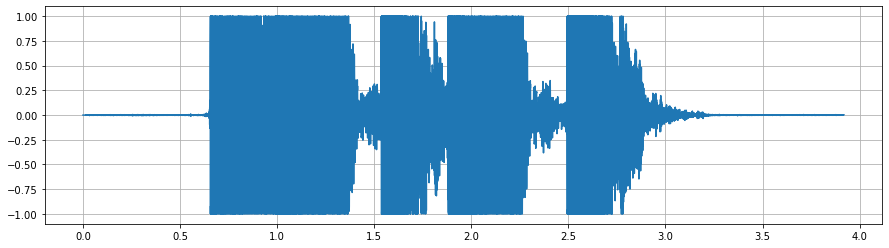

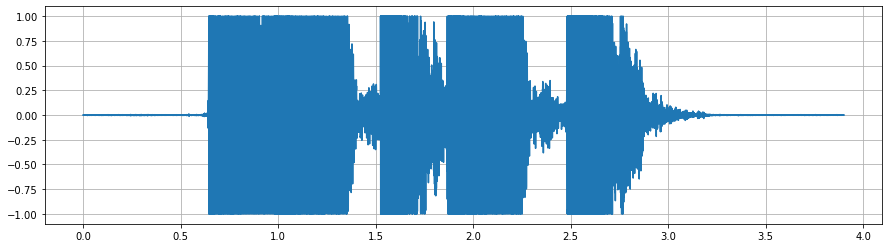

In [21]:
mfcc1,y,z,mfcc0 = mfcc_extract2(filename)

In [24]:
from scipy.io.wavfile import write
# Load some audio
y, sr = librosa.load(filename)
# Trim the beginning and ending silence
yt, index = librosa.effects.trim(y, top_db=40)
# Print the durations
print(librosa.get_duration(y), librosa.get_duration(yt))

scaled = np.int16(yt/np.max(np.abs(yt)) * 32767)
write('test.wav', 44100, scaled)

3.919002267573696 2.5774149659863945


C:\Users\HAIRUL~1\AppData\Local\Temp/ipykernel_7860/246098936.py:7: FutureWarning: Pass y=[-9.9724241e-07  1.4713531e-06  3.0905319e-06 ...  2.1497617e-03
  2.1275065e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  print(librosa.get_duration(y), librosa.get_duration(yt))
C:\Users\HAIRUL~1\AppData\Local\Temp/ipykernel_7860/246098936.py:7: FutureWarning: Pass y=[-0.00285797 -0.00182663 -0.00137585 ...  0.00622823  0.00517926
  0.00407383] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  print(librosa.get_duration(y), librosa.get_duration(yt))
